# Challenge \# 1: NTTData

Nota: hem fet gairebé tots els càlculs separant l'any en grups de 15 dies, de manera que considerem l'any com un histograma de 24 caixes

### Funció per endreçar respecte el temps/producte

In [8]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import math 
import pandas as pd
import datetime as dt

In [1]:
def ordena_codi_data(dades):

    llista = []

    for dada in dades.itertuples():
        data = dt.datetime.strptime(dada.FECHAPEDIDO, "%d/%m/%y")
        if data.day<10:
            dia = str(0)+str(data.day)
        else:
            dia = str(data.day)
        if data.month<10:
            mes = str(0)+str(data.month)
        else:
            mes = str(data.month)
        data2 = int(str(data.year)+mes+dia)
        llista.append(data2)

    dades['FECHAORD'] = llista

    dades_dates = dades.sort_values('FECHAORD', ascending=True)
    
    dades_guai = dades_dates.sort_values('CODIGO', kind='stable')
    
    del dades_guai['FECHAORD']
    
    return dades_guai

In [5]:
prova = np.zeros((4,12))

prova[1][5] = 4
print(prova[1])
print(prova)

data1 = "21/03/10"

data2 = dt.datetime.strptime(data1, "%d/%m/%y").year

[0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### Obtenim magnituds interessants, la quantitat total de productes comprats per categoria i any. Faran falta més endavant

In [9]:

datinga = pd.read_excel("medical.xlsx")

dades_xules = ordena_codi_data(datinga)

dades_xules

,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,ORIGEN,TGL,PRODUCTO
9367,B40558,19/04/16,445796/16,400505,4,1,9.90,39.60,Compra menor,0-14-32,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15
2655,B40558,06/05/16,491191/16,400505,5,1,9.90,49.50,Compra menor,0-18-109,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15
2657,B40558,06/05/16,491194/16,400505,2,1,9.90,19.80,Compra menor,0-18-62,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15
2656,B40558,06/05/16,491195/16,400505,5,1,9.90,49.50,Compra menor,0-18-105,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15
5757,B40558,12/05/16,506550/16,400505,5,1,9.90,49.50,Compra menor,0-18-108,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15
...,...,...,...,...,...,...,...,...,...,...,...,...
11606,F50071,23/06/23,780627/23,421554,10,5,114.95,229.90,Compra menor,0-11-151,TRANSITO,APOSITO DE HIDROFIBRA HIDROCOLOIDE P/ BOMBA DE...
276,F50071,01/08/23,939687/23,421554,5,5,114.95,114.95,Compra menor,0-9-74,TRANSITO,APOSITO DE HIDROFIBRA HIDROCOLOIDE P/ BOMBA DE...
317,F50071,01/09/23,1038634/23,421554,20,5,114.95,459.80,Compra menor,0-11-168,TRANSITO,APOSITO DE HIDROFIBRA HIDROCOLOIDE P/ BOMBA DE...
8698,F50071,17/10/23,1279047/23,421554,10,5,114.95,229.90,Compra menor,0-11-168,TRANSITO,APOSITO DE HIDROFIBRA HIDROCOLOIDE P/ BOMBA DE...


#### Definim un vector amb les etiquetes de les categories, pels gràfics

In [11]:
tipus_productes = ["B", "C", "E", "F"]

In [15]:
qty_total = np.zeros((4,9))

for index, row in dades_xules.iterrows():
    codi = row["CODIGO"][0]
    desar_a = tipus_productes.index(codi)
    moment = dt.datetime.strptime(row["FECHAPEDIDO"], "%d/%m/%y")
    if moment.day < 15:
        qty_total[desar_a][moment.year % 2015] += float(row["CANTIDADCOMPRA"])*float(row["UNIDADESCONSUMOCONTENIDAS"])
    else:
        qty_total[desar_a][moment.year % 2015] += float(row["CANTIDADCOMPRA"])*float(row["UNIDADESCONSUMOCONTENIDAS"])

In [25]:
import statistics as st

prova1 = [1,2,5,6,7]

print(st.mean(prova1))

4.2


In [242]:
from openpyxl import load_workbook
import csv
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates


dades = load_workbook("medical.xlsx", data_only = True)

tipus_productes = ["B", "C", "E", "F"]

quantitats = np.zeros((4,24))

j=0

for row in dades.active:
    if j == 0 or dt.datetime.strptime(row[1].value, "%d/%m/%y").year not in [2022]:
        j += 1
    else:
        datapart = dt.datetime.strptime(row[1].value, "%d/%m/%y")
        codi = [*row[0].value]
        desar_a = tipus_productes.index(codi[0])
        mes_comprat = datapart.month
        if datapart.day <= 15:
            quantitats[desar_a][(mes_comprat)*2-2] += row[4].value
        else:
            quantitats[desar_a][(mes_comprat)*2-1] += row[4].value

    #data.append(dt.datetime.strptime(row[1].value, "%d/%m/%y").date())
    #quantitat.append(row[4].value)


#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
#plt.title("Productes de cada categoria venuts per mes")
#plt.xlabel("Quantitat")

#for i in (0,1,3):
#    plt.plot(mesos,quantitats[i], marker = "o", label = "Tipus " + tipus_productes[i])
    
#plt.gcf().autofmt_xdate()
#plt.legend(loc='upper left', fontsize=14)
#plt.show()

### Detecció de pics, regions de max despesa

In [141]:
# volem pic, i no max absolut, perquè ens interessa el màxim local
# aquesta funció retorna la distància en posicions (assumeix separació regular entre valors) a la que es
# troba el pic més proper. el desplaçament positiu és cap a la dreta

def detecta_pic(yvals, estima_pic):
    i=0
    pos_dreta = 0
    pos_esquerra = 0
    dreta = False
    esquerra = False
    while abs(i)<len(yvals):
        if yvals[(estima_pic+ i) % len(yvals)] > yvals[(estima_pic-1+i) % len(yvals)] and yvals[(estima_pic+i) % len(yvals)] > yvals[(estima_pic+1+i) % len(yvals)]:
            pos_dreta = i
            dreta = True
            break
        elif i == len(yvals)-1:
            print("cap pic en 99 desplaçaments")
            break
        else:
            i += 1
    i = 0
    while abs(i)<len(yvals):
        if yvals[(estima_pic+ i) % len(yvals)] > yvals[(estima_pic-1+i) % len(yvals)] and yvals[(estima_pic+i) % len(yvals)] > yvals[(estima_pic+1+i) % len(yvals)]:
            pos_esquerra = i
            esquerra = True
            break
        elif abs(i) == len(yvals)-1:
            print("cap pic en 99 desplaçaments")
            break
        else:
            i += -1
            continue
    if dreta and esquerra:
        pospic = min(pos_dreta, abs(pos_esquerra))
        if pospic == abs(pos_esquerra):
            pospic = -pospic
    elif dreta:
        pospic = pos_dreta
    elif esquerra:
        pospic = pos_esquerra
    else:
        pospic = None
        print("Cap pic")
    return pospic

In [173]:
def detecta_pic2(yvals, estima_pic):
    i = 0
    if yvals[(estima_pic) % len(yvals)] > yvals[(estima_pic-1) % len(yvals)] and yvals[(estima_pic) % len(yvals)] > yvals[(estima_pic+1) % len(yvals)]:
        pospic = 0
    elif yvals[(estima_pic+1) % len(yvals)] > yvals[(estima_pic) % len(yvals)] and yvals[(estima_pic+1) % len(yvals)] > yvals[(estima_pic+2) % len(yvals)]:
        pospic = 1
    elif yvals[(estima_pic-1) % len(yvals)] > yvals[(estima_pic) % len(yvals)] and yvals[(estima_pic-1) % len(yvals)] > yvals[(estima_pic-2) % len(yvals)]:
        pospic = -1
    else:
        pospic = 4
    return pospic

In [130]:
# codi per provar la funció anterior

xvals = [1,2,3,4,5,6,7]
yvals = [1,2,1,3,4,7,3]

pos = 0

detecta_pic(yvals, 11)

-3


1

In [148]:
print(vals_anys[0][5])

detecta_pic(vals_anys[0][0], 0)

[0.00783068 0.01118668 0.01342402 0.00783068 0.01342402 0.00671201
 0.00783068 0.01230535 0.00894935 0.00559334 0.00894935 0.01118668
 0.01006802 0.01230535 0.01454269 0.01230535 0.00894935 0.00559334
 0.00894935 0.00894935 0.01230535 0.00671201 0.01118668 0.00783068]


-1

#### Obtenim els valors de productes comprats, separats per categoria, mes i any

In [149]:
vals_anys = np.zeros((4, 8, 24))
vals_temps = np.arange(1,25,1)

for index, row in dades_xules.iterrows():
    codi = row["CODIGO"][0]
    desar_a = tipus_productes.index(codi)
    moment = dt.datetime.strptime(row["FECHAPEDIDO"], "%d/%m/%y")
    
    # ara mateix cal normalitzar segons productes venuts per any (recordem, desats al vector qty_total) ja que volem comparar
    # entre anys, i cada any es ven una quantitat diferent de productes de cada categoria (demostrat més endavant)
    if moment.year not in [2023]:
        if moment.day < 15:
            vals_anys[desar_a][moment.year % 2015][moment.month*2-2] = float(row["CANTIDADCOMPRA"])*float(row["UNIDADESCONSUMOCONTENIDAS"])/qty_total[desar_a][moment.year % 2015]
        else:
            vals_anys[desar_a][moment.year % 2015][moment.month*2-1] = float(row["CANTIDADCOMPRA"])*float(row["UNIDADESCONSUMOCONTENIDAS"])/qty_total[desar_a][moment.year % 2015]

#### Detectem els pics de cada any. Observarem la posició dels pics i el seu desplaçament horitzontal, el que ens indicarà quines són aproximadament les regions de l'any amb més demanda per cada tipus de producte

In [166]:
prova1 = [2,3,6]
prova2=[3,6,7]
print(prova1+prova2)

[2, 3, 6, 3, 6, 7]


In [211]:
pesos_anys = np.zeros((4,8,24))
suma_anys = np.zeros((4,24))


for i in range(3):
    for j in range(8):
        for k in range(24):
            pesos_anys[i][j][k] = abs(detecta_pic(vals_anys[i][j], k))
            suma_anys[i][k] += abs(detecta_pic(vals_anys[i][j], k))
            
i=3
for j in [5,6,7]:
    for k in range(24):
        pesos_anys[3][j][k] = abs(detecta_pic(vals_anys[i][j], k))
        suma_anys[3][k] += abs(detecta_pic(vals_anys[i][j], k))
            
for i in range(3):
    maxval = max(suma_anys[i])
    for j in range(24):
        suma_anys[i][j] = (maxval-suma_anys[i][j])/maxval*100
#print(pesos_anys[0])


maxval = max(suma_anys[3])
for k in range(24):
    suma_anys[3][k] = (maxval - suma_anys[3][k])/maxval*100
    
#for i in range(4):
 #   for j in range(8):
  #      suma_anys[i][j] = sum(pesos_anys[i])


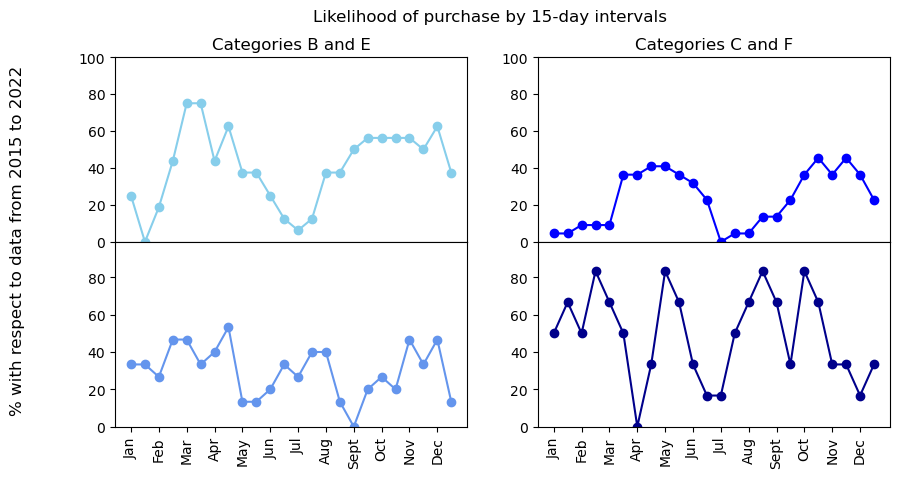

In [279]:
mesos = np.arange(1,25,1)
#mesosnom = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
mesosnom = ["Jan", "Jan", "Feb", "Feb", "Mar", "Mar", "Apr", "Apr", "May", "May", "Jun", "Jun", "Jul", "Jul", "Aug", "Aug", "Sept", "Sept", "Oct", "Oct", "Nov", "Nov", "Dec", "Dec"]


fig, axs = plt.subplots(2,2, sharex=True)

fig.set_figwidth(10)

fig.subplots_adjust(hspace=0)
#(ax1, ax2), (ax3, ax4) = fig.subplots(sharex='col', sharey='row')

fig.suptitle("Likelihood of purchase by 15-day intervals")

colors = ["skyblue", "blue", "cornflowerblue", "darkblue"]

fig.supylabel('% with respect to data from 2015 to 2022')

axs[1][0].set_xticks(ticks = mesos, labels = mesosnom, rotation = 90, fontsize=10)
axs[1][1].set_xticks(ticks = mesos, labels = mesosnom, rotation = 90, fontsize=10)


axs[1][0].set_xticks(axs[1][0].get_xticks()[::2])
#axs[1][1].set_xticks(axs[1][0].get_xticks()[::2])


mesos = np.arange(1,25,1)

axs[0][0].plot(mesos,suma_anys[0], marker = "o", color = colors[0])
axs[0][0].set_ylim([0,100])
axs[0][0].set_title("Categories B and E")
axs[0][1].plot(mesos,suma_anys[1], marker = "o", color = colors[1])
axs[0][1].set_ylim([0,100])

axs[1][0].plot(mesos,suma_anys[2], marker = "o", color = colors[2])
axs[1][0].set_ylim([0,99])
axs[0][1].set_title("Categories C and F")
axs[1][1].plot(mesos,suma_anys[3], marker = "o", color = colors[3])
axs[1][1].set_ylim([0,99])

#plt.savefig("likelihood.jpg", format = "jpg", dpi=1200)


### Histogrames per any, desviació estàndard

In [39]:
import numpy as np

histosmes = np.zeros((4,24,9)) # quatre productes, nou histogrames per cadascun, un per any

venuts_any = np.zeros((4,9))

j = 0

for row in dades.active:
    if j == 0:# or dt.datetime.strptime(row[1].value, "%d/%m/%y").year in [2020, 2021]:
        j += 1
    else:
        datapart = dt.datetime.strptime(row[1].value, "%d/%m/%y")
        codi = [*row[0].value]
        desar_a = tipus_productes.index(codi[0])
        mes_comprat = datapart.month
        venuts_any[desar_a][datapart.year%2015] += row[4].value
        if datapart.day <= 15:
            histosmes[desar_a][(mes_comprat)*2-2][datapart.year % 2015] += row[4].value
        else:
            histosmes[desar_a][(mes_comprat)*2-1][datapart.year%2015] += row[4].value

venuts_mes = np.zeros((4,24)) # llista de productes venuts per cada mes, 4 categories
stdev_mes = np.zeros((4,24))

print(venuts_any)
# Normalitzem histogrames:


# F no es ven fins 2019?
for k in (0,1,2,3,4,7,8):
    for i in range(3):
        for j in range(24):
            #if venuts_any[i][k] == 0:
                #print(histosmes[i][j][k])
             #   continue
            #else:
            histosmes[i][j][k] = histosmes[i][j][k]/venuts_any[i][k]
        

        
# Trobem histogrames normalitzats

for i in range(3):
    for j in range(24):
        venuts_mes[i][j] = st.mean(histosmes[i][j])
        stdev_mes[i][j] = st.stdev(histosmes[i][j])




# Histogrames sense normalitzar
#for i in range(4):
#    for j in range(24):
#        venuts_mes[i][j] = st.mean(histosmes[i][j])
#        stdev_mes[i][j] = st.stdev(histosmes[i][j])

[[2.45000e+03 3.59700e+03 4.86600e+03 7.36300e+03 9.99400e+03 9.29200e+03
  1.27450e+04 1.65240e+04 1.54630e+04]
 [4.20000e+03 4.20000e+03 3.85000e+03 2.80000e+03 5.60000e+03 3.50000e+03
  4.55000e+03 3.50000e+03 3.50000e+03]
 [5.08691e+05 5.22461e+05 5.62079e+05 5.82852e+05 6.48918e+05 5.83461e+05
  6.26754e+05 8.66700e+05 7.66255e+05]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 5.73000e+02 1.16000e+03
  2.54300e+03 2.98900e+03 2.82200e+03]]


Text(0.5, 1.0, 'Category E')

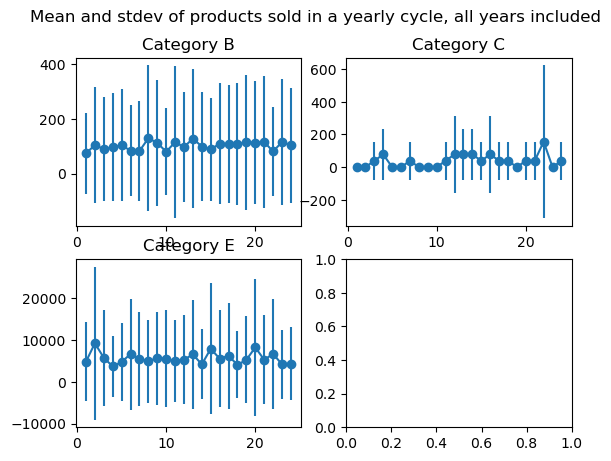

In [40]:
mesos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

fig, axs = plt.subplots(2,2)

fig.suptitle("Mean and stdev of products sold in a yearly cycle, all years included")

axs[0][0].errorbar(mesos,venuts_mes[0], yerr = stdev_mes[0], marker = "o")
axs[0][0].set_title("Category " + tipus_productes[0])
axs[0][1].errorbar(mesos,venuts_mes[1], yerr = stdev_mes[1], marker = "o")
axs[0][1].set_title("Category " + tipus_productes[1])
axs[1][0].errorbar(mesos,venuts_mes[2], yerr = stdev_mes[2], marker = "o")
axs[1][0].set_title("Category " + tipus_productes[2])
#axs[1][1].errorbar(mesos,venuts_mes[3], yerr = stdev_mes[3], marker = "o")
#axs[1][1].set_title("Category " + tipus_productes[3])


### Productes que es venen conjuntament

In [46]:
venuts_magat = np.zeros((4,9,2))

j = 0

for row in dades.active:
    if j == 0:# or dt.datetime.strptime(row[1].value, "%d/%m/%y").year in [2020, 2021]:
        j += 1
    else:
        datapart = dt.datetime.strptime(row[1].value, "%d/%m/%y")
        codi = [*row[0].value]
        desar_a = tipus_productes.index(codi[0])
        mes_comprat = datapart.month
        venuts_magat[desar_a][datapart.year%2015][1] += row[4].value
        if row[10].value == "ALMACENABLE":
            venuts_magat[desar_a][datapart.year%2015][0] += row[4].value


ValueError: time data 'FECHAPEDIDO' does not match format '%d/%m/%y'

In [ ]:
mesos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

fig, axs = plt.subplots(2,2)

fig.suptitle("Mean and stdev of products sold in a yearly cycle, all years included")

axs[0][0].errorbar(mesos,venuts[0], yerr = stdev_mes[0], marker = "o")
axs[0][0].set_title("Category " + tipus_productes[0])
axs[0][1].errorbar(mesos,venuts_mes[1], yerr = stdev_mes[1], marker = "o")
axs[0][1].set_title("Category " + tipus_productes[1])
axs[1][0].errorbar(mesos,venuts_mes[2], yerr = stdev_mes[2], marker = "o")
axs[1][0].set_title("Category " + tipus_productes[2])
#axs[1][1].errorbar(mesos,venuts_mes[3], yerr = stdev_mes[3], marker = "o")
#axs[1][1].set_title("Category " + tipus_productes[3])

In [ ]:
mesos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]



### Productes venuts cada any

In [244]:
venuts_magat = np.zeros((4,9,2))

magat_percent = np.zeros((4,9))

j = 0

for row in dades.active:
    if j == 0:# or dt.datetime.strptime(row[1].value, "%d/%m/%y").year in [2020, 2021]:
        j += 1
    else:
        datapart = dt.datetime.strptime(row[1].value, "%d/%m/%y")
        codi = [*row[0].value]
        desar_a = tipus_productes.index(codi[0])
        mes_comprat = datapart.month
        venuts_magat[desar_a][datapart.year%2015][1] += row[4].value*row[5].value
        #if datapart.month == 1:
        venuts_magat[desar_a][datapart.year%2015][0] += row[4].value*row[5].value
            
for i in range(4):
    for j in range(9):
            #continue
        magat_percent[i][j] = venuts_magat[i][j][0]#/venuts_magat[i][j][1]
        
desvests = np.zeros((4,9))

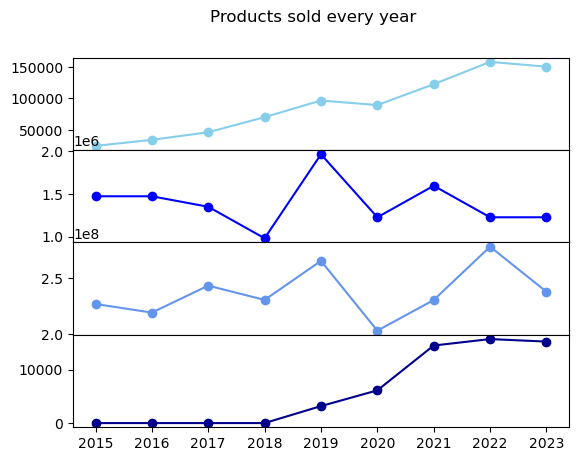

In [259]:
mesos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

anys = [2015,2016,2017,2018,2019,2020,2021,2022,2023]

fig, axs = plt.subplots(4, sharex=True)
fig.subplots_adjust(hspace=0)

fig.suptitle("Products sold every year")

colors = ["skyblue", "blue", "cornflowerblue", "darkblue"]

for i, ax in enumerate(axs):
    axs[i].ticklabel_format(axis='y', style='sci')
    axs[i].plot(anys,magat_percent[i], marker = "o", color = colors[i], label = "Category " + tipus_productes[i])
#axs[1].plot(anys,magat_percent[1], marker = "o", color = "blue")
#axs[1].set_title("Category " + tipus_productes[1])
#axs[2].plot(anys,magat_percent[2], marker = "o", color = "cornflowerblue")
#axs[2].set_title("Category " + tipus_productes[2])
#axs[3].plot(anys,magat_percent[3], marker = "o", color = "darkblue")
#axs[3].set_title("Category " + tipus_productes[3])

### Nombre d'hospitals

In [141]:
hospitals = []

j = 0

for row in dades.active:
    hospital = str(row[9].value)[2]+str(row[9].value)[3]
    if j == 0:
        j += 1
    elif hospital not in hospitals:
        hospitals.append(hospital)
def trobar_hospital(hospitals)
    if hospitals[i][1] == "-":
        hospitals[i] = hospitals[i][0]
    return hospitals
        
print(hospitals)
print(" Nombre d'hospitals: ", len(hospitals))

2
4
6
0
7
9
8
3
5
1
['2', '10', '4', '6', '0', '13', '11', '18', '12', '14', '15', '17', '7', '9', '8', '3', '5', '1', '19', '16']
 Nombre d'hospitals:  20


### Temps entre comandes, temps esperat

In [17]:
def temps_entre(data1,data2):
    date_format = "%d/%m/%y"

    a = dt.datetime.strptime(data1, date_format)
    b = dt.datetime.strptime(data2, date_format)

    delta = b - a
    return delta.days

In [285]:
# Comptem objectes:

obj = str()
objectes = [] # preu per objecte, objectes

for index, row in dades_xules.iterrows():
    if row["CODIGO"] == obj:
        continue
    else:
        objectes.append(row["CODIGO"])
        obj = row["CODIGO"]


print(objectes)
np.sort(objectes)

['B40558', 'B41691', 'C26183', 'C56207', 'E64488', 'E64543', 'E64544', 'E64663', 'E64750', 'E64751', 'E64761', 'E64764', 'E64765', 'E64898', 'E64911', 'E64932', 'E64940', 'E64946', 'E64983', 'E65007', 'E65056', 'E65159', 'E65201', 'E65485', 'E65486', 'E65509', 'E65894', 'E66071', 'E67462', 'E67835', 'E69682', 'E70130', 'E73753', 'E78950', 'E85758', 'E85769', 'E99807', 'E99808', 'F42922', 'F43325', 'F43331', 'F43580', 'F43581', 'F43585', 'F44200', 'F46843', 'F46846', 'F50071']


array(['B40558', 'B41691', 'C26183', 'C56207', 'E64488', 'E64543',
       'E64544', 'E64663', 'E64750', 'E64751', 'E64761', 'E64764',
       'E64765', 'E64898', 'E64911', 'E64932', 'E64940', 'E64946',
       'E64983', 'E65007', 'E65056', 'E65159', 'E65201', 'E65485',
       'E65486', 'E65509', 'E65894', 'E66071', 'E67462', 'E67835',
       'E69682', 'E70130', 'E73753', 'E78950', 'E85758', 'E85769',
       'E99807', 'E99808', 'F42922', 'F43325', 'F43331', 'F43580',
       'F43581', 'F43585', 'F44200', 'F46843', 'F46846', 'F50071'],
      dtype='<U6')

In [19]:
obj = ""
item_anterior = 0
dataprev = "19/04/16"

#intervals = np.zeros((4,20,48))

intervals, int_obj = [], []

#int_obj = list()

nobjs = 0

for index, row in dades_xules.iterrows():

    codi = [*row[0].value]
    desar_a = tipus_productes.index(codi[0])
    hospital = trobar_hospital(row["ORIGEN"])
    
    if row["CODIGO"] == obj:
        intervals[desar_a][hospital][]
        int_obj.append(temps_entre(dataprev, row["FECHAPEDIDO"]))
        print(temps_entre(dataprev, row["FECHAPEDIDO"]))
        #intervals[nobjs] = temps_entre(dataprev, row["FECHAPEDIDO"]))
        dataprev = row["FECHAPEDIDO"]
    else:
        #np.append(intervals[nobjs] = int_obj
        np.append(intervals, int_obj)
        nobjs += 1
        obj = row["CODIGO"]
    
print(intervals)

SyntaxError: invalid syntax (2011540185.py, line 20)

### Clustering: variables en funció de l'hospital, trobem candidats especifics

In [21]:
hospi = "0-10-1"

print(hospi[2]+hospi[3])

hospitals = np.arange(0,20,1)
print(hospitals)

def trobar_hospital(hospi):
    hospital = hospi[2]+hospi[3]
    if hospital[1] == "-":
        hospital = hospital[0]
    return hospital
print(trobar_hospital("1-17-23"))

10
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
17


In [271]:
info_cluster = np.zeros((4,3,20))


j = 0

for row in dades.active:
    if j == 0:
        j += 1
    else:
        hospital = int(trobar_hospital(str(row[9].value)[2]+str(row[9].value)[3]))
        moment = dt.datetime.strptime(row[1].value, "%d/%m/%y")
        codi = [*row[0].value]
        desar_a = tipus_productes.index(codi[0])
        info_cluster[desar_a][0][hospital] = row[4].value +1 # desem quantitat
        info_cluster[desar_a][1][hospital] = row[7].value  # desem diners
        info_cluster[desar_a][2][hospital] = moment.month  # desem temps trigat


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


Text(0.5, 1.0, 'Category F')

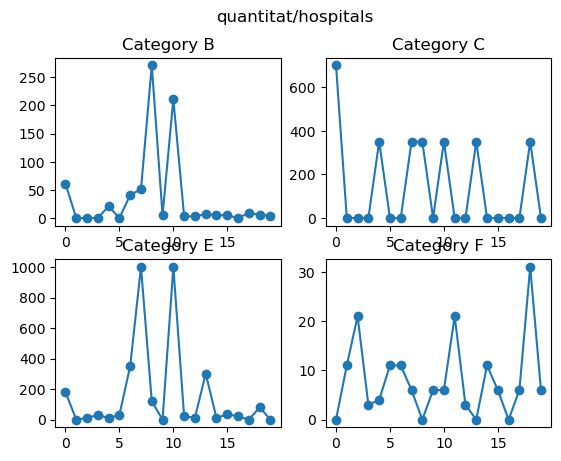

In [268]:
mesos = np.arange(1,25,1)
print(mesos)

fig, axs = plt.subplots(2,2)

fig.suptitle("quantitat/hospitals")
axs[0][0].plot(hospitals,info_cluster[0][0], marker = "o")
axs[0][0].set_title("Category " + tipus_productes[0])
axs[0][1].plot(hospitals,info_cluster[1][0], marker = "o")
axs[0][1].set_title("Category " + tipus_productes[1])
axs[1][0].plot(hospitals,info_cluster[2][0], marker = "o")
axs[1][0].set_title("Category " + tipus_productes[2])
axs[1][1].plot(hospitals,info_cluster[3][0], marker = "o")
axs[1][1].set_title("Category " + tipus_productes[3])

#### Trobem i endrecem llista de productes per categoria, pel heatmap

In [22]:
# Comptem objectes:

obj = str()
objectes = []

for index, row in dades_xules.iterrows():
    if row["CODIGO"] == obj:
        continue
    else:
        objectes.append(row["CODIGO"])
        obj = row["CODIGO"]
        
np.sort(objectes)
print(objectes)

['B40558', 'B41691', 'C26183', 'C56207', 'E64488', 'E64543', 'E64544', 'E64663', 'E64750', 'E64751', 'E64761', 'E64764', 'E64765', 'E64898', 'E64911', 'E64932', 'E64940', 'E64946', 'E64983', 'E65007', 'E65056', 'E65159', 'E65201', 'E65485', 'E65486', 'E65509', 'E65894', 'E66071', 'E67462', 'E67835', 'E69682', 'E70130', 'E73753', 'E78950', 'E85758', 'E85769', 'E99807', 'E99808', 'F42922', 'F43325', 'F43331', 'F43580', 'F43581', 'F43585', 'F44200', 'F46843', 'F46846', 'F50071']


### Heat map: (x-producte, y-hospital, 3dim-qty)

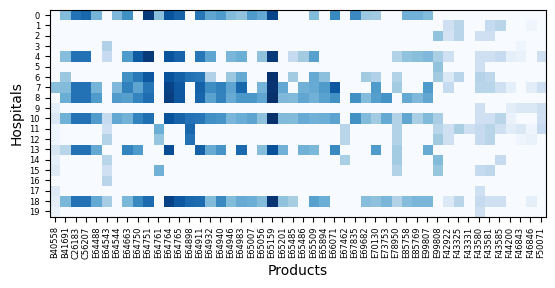

In [23]:
import math

heatmap = np.zeros((20, 48))
hospitals = np.arange(0,20,1)

matrix = [[], [], [], []]

prod_categoria = np.zeros((4))

for index, row in dades_xules.iterrows():
    codi = [*row["CODIGO"]][0]
    prod_categoria[tipus_productes.index(codi)] += float(row["CANTIDADCOMPRA"])*float(row["UNIDADESCONSUMOCONTENIDAS"])

for index, row in dades_xules.iterrows():
    #datapart = dt.datetime.strptime(row[1].value, "%d/%m/%y")
    codi = row["CODIGO"]
    desa_a = tipus_productes.index([*codi][0])
    hospital = int(trobar_hospital(row["ORIGEN"]))
    heatmap[hospital][objectes.index(codi)] = (math.log(float(row["CANTIDADCOMPRA"])*float(row["UNIDADESCONSUMOCONTENIDAS"])))#/prod_categoria[desa_a]
    
ticks = np.arange(0,48,1)
    
plt.ylabel("Hospitals")
plt.xlabel("Products")
plt.imshow(heatmap, "Blues")
#plt.colorbar(plt.pcolor(heatmap))
plt.yticks(np.arange(0, 20,1), fontsize=6)
plt.xticks(ticks = ticks, labels = objectes, rotation = 90, fontsize=6)
#plt.savefig("hospital heatmap.jpg", format="jpg", dpi=1200)
plt.show()

#print(heatmap)

In [ ]:
temps_num[0][0][2]

v_inst = (temps_num[producte]-temps_num[producte-1])/temps_num[interval]